In [2]:
from cartopy import crs as ccrs
import cartopy.feature as cfeature
import multiprocessing
import sys
import cartopy.feature as cfeature
import cmaps
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import xarray as xr
from cartopy import crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter  # 专门提供经纬度的
from cartopy.util import add_cyclic_point
from matplotlib import gridspec
from matplotlib import ticker
from matplotlib.pyplot import quiverkey
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.ndimage import filters
from toolbar.significance_test import corr_test
from toolbar.TN_WaveActivityFlux import TN_WAF_3D
from toolbar.curved_quivers.modplot import *

In [ ]:
# 绘图
    # ##地图要素设置
if __name__ == '__main__':
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.rcParams['axes.unicode_minus'] = False
    fig = plt.figure(figsize=(16, 9))  # 创建画布
    lev = 15
    p_all = [100, 150, 200, 300, 500, 600, 700, 850]
    spec = gridspec.GridSpec(nrows=5, ncols=1)  # 设置子图比例
    col = -1
    alpha = 0.05
    col += 1
    x = 0.92
    y = 1.04
    title_size = 8
    extent1 = [-67.5, 292.5, -30, 80]
    xticks1 = np.arange(-180, 180, 10)
    yticks1 = np.arange(extent1[2], extent1[3] + 1, 30)
    # 计算TN波作用通量
r'''        reg_z150 = np.load(fr"D:\PyFile\paper1\cache\uvz\reg_z150_same.npy")
    reg_z200 = np.load(fr"D:\PyFile\paper1\cache\uvz\reg_z200_same.npy")
    reg_z300 = np.load(fr"D:\PyFile\paper1\cache\uvz\reg_z300_same.npy")
    reg_3d = np.array([reg_z150, reg_z200, reg_z300])
    Geoc = xr.DataArray(z_diff_3d.mean('year').data,
                                    coords=[('level', [150, 200, 300]),
                                            ('lat', z_diff_3d['lat'].data),
                                            ('lon', z_diff_3d['lon'].data)])
    Uc = xr.DataArray(u_diff_3d.mean('year').data,
                                    coords=[('level', [150, 200, 300]),
                                            ('lat', u_diff_3d['lat'].data),
                                            ('lon', u_diff_3d['lon'].data)])
    Vc = xr.DataArray(v_diff_3d.mean('year').data,
                                    coords=[('level', [150, 200, 300]),
                                            ('lat', v_diff_3d['lat'].data),
                                            ('lon', v_diff_3d['lon'].data)])
    GEOa = xr.DataArray(reg_3d,
                                    coords=[('level', [150, 200, 300]),
                                            ('lat', z_diff_3d['lat'].data),
                                            ('lon', z_diff_3d['lon'].data)])
    waf_x, waf_y, waf_z = TN_WAF_3D(Geoc, Uc, Vc, GEOa, Tc)
'''
    ax = fig.add_subplot(512, projection=ccrs.PlateCarree(central_longitude=180+extent1[0]))
    ax.set_title('200hPa UV&WAF&WAF_W', fontsize=title_size, loc='left')
    waf, lon = add_cyclic_point(waf_z[1], coord=z_diff['lon'])
    wafz图层 = ax.contourf(lon, z_diff['lat'], waf,
                                           levels=np.array([-1., -.8, -.6, -.4, -.2, -.05, .05, .2, .4, .6, .8, 1.])*0.001,
                                           cmap=cmaps.MPL_PiYG_r[11+10:55]+ cmaps.CBR_wet[0] + cmaps.CBR_wet[0] + cmaps.CBR_wet[0] + cmaps.CBR_wet[0] + cmaps.CBR_wet[0] + cmaps.CBR_wet[0] + cmaps.MPL_PiYG_r[72:116-10],
                                           extend='both',
                                           transform=ccrs.PlateCarree(central_longitude=0))
    WAF图层 = Curlyquiver(ax, z_diff['lon'], z_diff['lat'][:180],
                                  waf_x[1, :180, :], waf_y[1, :180, :],
                                  regrid=10, lon_trunc=-67.5, arrowsize=.5, scale=8, linewidth=0.8,
                                  color='blue', transform=ccrs.PlateCarree(central_longitude=0), arrowstyle='fancy')
    WAF图层.key(fig, U=.1, label='0.1 m$^2$/s$^2$', lr=-1.1)
    ax.set_extent(extent1, crs=ccrs.PlateCarree(central_longitude=0))
    ax.add_feature(cfeature.COASTLINE.with_scale('110m'), linewidth=0.2)
        # 在赤道画一条纬线
    ax.plot((extent1[0], extent1[1]), (0, 0), color='red', linewidth=1, linestyle=(0,(2, 1, 1, 1)),transform=ccrs.PlateCarree(central_longitude=0))
    ax.add_geometries(Reader(r"D:\PyFile\map\地图边界数据\长江区1：25万界线数据集（2002年）\长江区.shp").geometries(),
                                  ccrs.PlateCarree(central_longitude=0), facecolor='none',edgecolor='black',linewidth=.4)

    # 刻度线设置
    # ax1
    ax.set_yticks(yticks1, crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter()
    lat_formatter = LatitudeFormatter()
    ax.yaxis.set_major_formatter(lat_formatter)


    ymajorLocator = MultipleLocator(30)  # 先定义xmajorLocator，再进行调用
    ax.yaxis.set_major_locator(ymajorLocator)  # x轴最大刻度
    yminorLocator = MultipleLocator(10)
    ax.yaxis.set_minor_locator(yminorLocator)  # x轴最小刻度
        # ax1.axes.xaxis.set_ticklabels([]) ##隐藏刻度标签
        # 最大刻度、最小刻度的刻度线长短，粗细设置
    ax.tick_params(which='major', length=4, width=.5, color='black')  # 最大刻度长度，宽度设置，
    ax.tick_params(which='minor', length=2, width=.2, color='black')  # 最小刻度长度，宽度设置
    ax.tick_params(which='both', bottom=True, top=False, left=True, labelbottom=True, labeltop=False)
    plt.rcParams['ytick.direction'] = 'out'  # 将x轴的刻度线方向设置向内或者外
        # 调整刻度值字体大小
    ax.tick_params(axis='both', labelsize=title_size, colors='black')

        # 设置色标
    ax_ins1 = inset_axes(
                    ax,
                    width="1.25%",  # width: 5% of parent_bbox width
                    height="100%",  # height: 50%
                    loc="lower left",
                    bbox_to_anchor=(1.07, 0., 1, 1),
                    bbox_transform=ax.transAxes,
                    borderpad=0,
                )
    ax_ins1.set_xticks([])
    ax_ins1.set_yticks([])

    cbar = plt.colorbar(wafz图层, orientation='vertical', drawedges=True, cax=ax_ins1)
    cbar.Location = 'eastoutside'
    cbar.locator = ticker.FixedLocator(np.array([-1., -.8, -.6, -.4, -.2, -.05, .05, .2, .4, .6, .8, 1.])*0.001)
    cbar.set_ticklabels(['-1 ($×10^{-3}$)', '-0.8', '-0.6', '-0.4', '-0.2', '-0.05','0.05','0.2','0.4','0.6','0.8','1'])
    #cbar.ax.set_title('Proportion of EHT-Grids(%)', fontsize=5)
    cbar.ax.tick_params(length=0)  # 设置色标刻度长度
    cbar.ax.tick_params(labelsize=4)
    cbar.dividers.set_linewidth(.2)  # 设置分割线宽度
    cbar.outline.set_linewidth(.2)  # 设置色标轮廓宽度


D:\Code\work\Meteorological\toolbar\curved_quivers\modplot.py:212: UserWarning: 已将Y轴反转，因为Y轴坐标轴为非增长序列。
  warnings.warn('已将Y轴反转，因为Y轴坐标轴为非增长序列。', UserWarning)
绘制曲轴矢量: 100%|██████████| 393/393 [00:01<00:00, 227.24条/s]


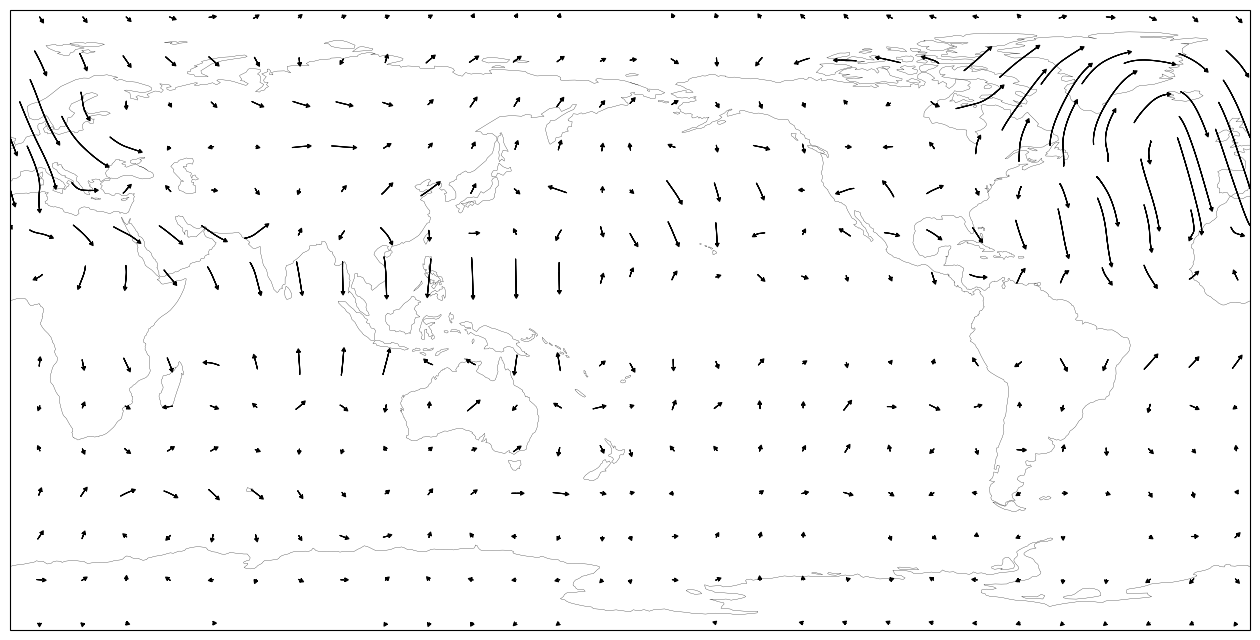

In [7]:
wind = xr.open_dataset(r"D:\PyFile\winter_200hPa_TN.nc")
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure(figsize=(16, 9))  # 创建画布
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
ax.add_feature(cfeature.COASTLINE.with_scale('110m'), linewidth=0.2)
Cq = Curlyquiver(ax, wind['lonuv'], wind['latuv'], wind['fx'], wind['fy'],
                regrid=15, lon_trunc=0, arrowsize=.6, scale=8, linewidth=.8,
                color='k', transform=ccrs.PlateCarree(central_longitude=0), arrowstyle='fancy')
